In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [2]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

#컨볼루션 오토인코더에서는 인풋이 이미지 그대로 들어간다. (28x28)
#기본적인 오토인코더가 MLP 모형으로 이루어졌다면, 컨볼루션 오토인코더는 CNN(Convolutional Neural Networks)으로 이루어졌다고 볼 수 있다.

input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1024,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
59/59 [==============================] - 19s 315ms/step - loss: 0.4947 - val_loss: 0.3412
Epoch 2/50
59/59 [==============================] - 18s 311ms/step - loss: 0.2521 - val_loss: 0.2062
Epoch 3/50
59/59 [==============================] - 18s 313ms/step - loss: 0.1880 - val_loss: 0.1738
Epoch 4/50
59/59 [==============================] - 18s 313ms/step - loss: 0.1666 - val_loss: 0.1584
Epoch 5/50
59/59 [==============================] - 18s 313ms/step - loss: 0.1541 - val_loss: 0.1480
Epoch 6/50
59/59 [==============================] - 18s 313ms/step - loss: 0.1455 - val_loss: 0.1407
Epoch 7/50
59/59 [==============================] - 18s 314ms/step - loss: 0.1394 - val_loss: 0.1355
Epoch 8/50
59/59 [==============================] - 18s 312ms/step - loss: 0.1349 - val_loss: 0.1316
Epoch 9/50
59/59 [==============================] - 18s 313ms/step - loss: 0.1315 - val_loss: 0.1286
Epoch 10/50
59/59 [==============================] - 18s 312ms/step - loss: 0.1288 - val_lo

In [5]:
decoded_imgs = autoencoder.predict(x_test)

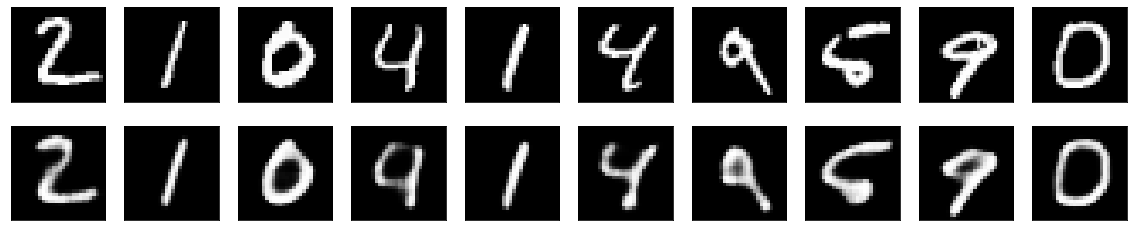

In [6]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()